In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('Billionaires Statistics Dataset.csv')

In [30]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [31]:
df.shape

(2640, 35)

In [32]:
# Columns to be deleted
columns_to_delete = ['rank','personName','city','source','countryOfCitizenship',
                     'category','organization','selfMade','birthDate','lastName',
                     'firstName','title','date','state','residenceStateRegion',
                     'birthYear','birthMonth','birthDay','cpi_country','cpi_change_country',
                     'gdp_country','gross_tertiary_education_enrollment','gross_primary_education_enrollment_country',
                     'life_expectancy_country','tax_revenue_country_country','total_tax_rate_country',
                     'population_country','latitude_country','longitude_country']

# Deleting the specified columns
df.drop(columns=columns_to_delete, inplace=True)

# Display the modified DataFrame
print(df)

      finalWorth   age        country             industries status gender
0         211000  74.0         France       Fashion & Retail      U      M
1         180000  51.0  United States             Automotive      D      M
2         114000  59.0  United States             Technology      D      M
3         107000  78.0  United States             Technology      U      M
4         106000  92.0  United States  Finance & Investments      D      M
...          ...   ...            ...                    ...    ...    ...
2635        1000  51.0          China             Healthcare      D      M
2636        1000  80.0  United States        Food & Beverage      E      M
2637        1000  60.0          China          Manufacturing      R      M
2638        1000  71.0          China            Real Estate      D      M
2639        1000  66.0    Philippines            Diversified      R      M

[2640 rows x 6 columns]


In [33]:
df.head()

,finalWorth,age,country,industries,status,gender
0,211000,74.0,France,Fashion & Retail,U,M
1,180000,51.0,United States,Automotive,D,M
2,114000,59.0,United States,Technology,D,M
3,107000,78.0,United States,Technology,U,M
4,106000,92.0,United States,Finance & Investments,D,M


In [35]:
mv=df.isnull().sum()
print(mv)

finalWorth     0
age           65
country       38
industries     0
status         0
gender         0
dtype: int64


In [36]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
mv=df.isnull().sum()
print(mv)

finalWorth    0
age           0
country       0
industries    0
status        0
gender        0
dtype: int64


In [37]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

finalWorth      int64
age           float64
country        object
industries     object
status         object
gender         object
dtype: object


In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for column in ['finalWorth','age','country','industries', 'status','gender' ]:
    df[column] = label_encoder.fit_transform(df[column])

In [42]:
from sklearn.preprocessing import StandardScaler

# For example, if you want to standardize columns 'A' and 'B':
columns_to_standardize = ['country_encoded', 'industries_encoded','status_encoded','gender_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [43]:
df.head()

,finalWorth,age,country,industries,status,gender,country_encoded,industries_encoded,status_encoded,gender_encoded
0,218,53,24,4,5,1,-0.886015,-0.881773,1.327401,0.382532
1,217,29,74,0,0,1,1.093639,-1.727200,-0.905799,0.382532
2,216,37,74,16,0,1,1.093639,1.654506,-0.905799,0.382532
3,215,57,74,16,5,1,1.093639,1.654506,1.327401,0.382532
4,214,71,74,5,0,1,1.093639,-0.670417,-0.905799,0.382532


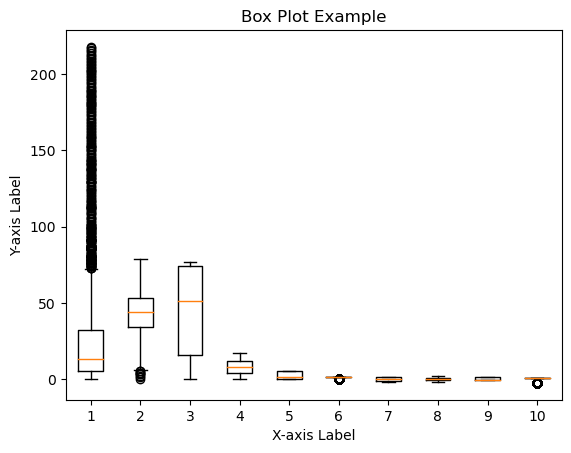

In [44]:
# Create a box plot
plt.boxplot(df)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [54]:
# Define a function to identify and remove outliers
def remove_outliers(df, threshold=1.0):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    return df[(df >= lower_bound) & (df <= upper_bound)]


# Remove outliers
cleaned_data = remove_outliers(df)

print("Original Data:", df)
print("Cleaned Data:", cleaned_data)

Original Data:       finalWorth  age  country  industries  status  gender  country_encoded  \
0            218   53       24           4       5       1        -0.886015   
1            217   29       74           0       0       1         1.093639   
2            216   37       74          16       0       1         1.093639   
3            215   57       74          16       5       1         1.093639   
4            214   71       74           5       0       1         1.093639   
...          ...  ...      ...         ...     ...     ...              ...   
2635           0   29       16           8       0       1        -1.202760   
2636           0   59       74           6       1       1         1.093639   
2637           0   38       16          10       3       1        -1.202760   
2638           0   50       16          13       0       1        -1.202760   
2639           0   45       53           2       3       1         0.262184   

      industries_encoded  status_enc

In [55]:
cleaned_data.head()

,finalWorth,age,country,industries,status,gender,country_encoded,industries_encoded,status_encoded,gender_encoded
0,NaN,NaN,24.0,4,5,1,-0.886015,-0.881773,1.327401,0.382532
1,NaN,29.0,NaN,0,0,1,1.093639,-1.727200,-0.905799,0.382532
2,NaN,NaN,NaN,16,0,1,1.093639,1.654506,-0.905799,0.382532
3,NaN,NaN,NaN,16,5,1,1.093639,1.654506,1.327401,0.382532
4,NaN,NaN,NaN,5,0,1,1.093639,-0.670417,-0.905799,0.382532


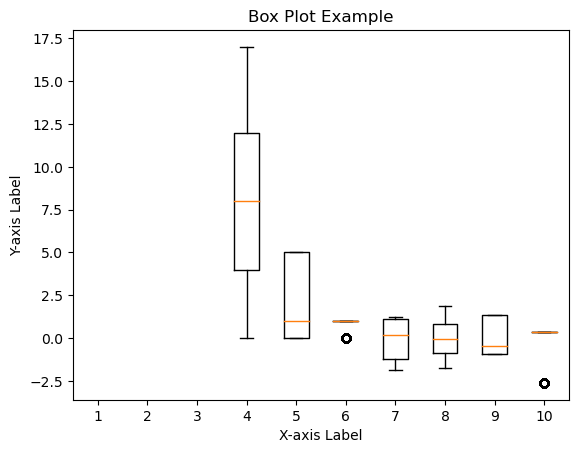

In [56]:
# Create a box plot
plt.boxplot(cleaned_data)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df[['age']],  # Use only the 'age' column
    df['age'],
    test_size=0.2,
    random_state=42
)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Make predictions on the test set
y_pred = model.predict(X_test)
#y_pred

In [83]:
# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')



Mean Squared Error: 2.6313292164303904e-29



Mean Squared Error: 2.6313292164303904e-29


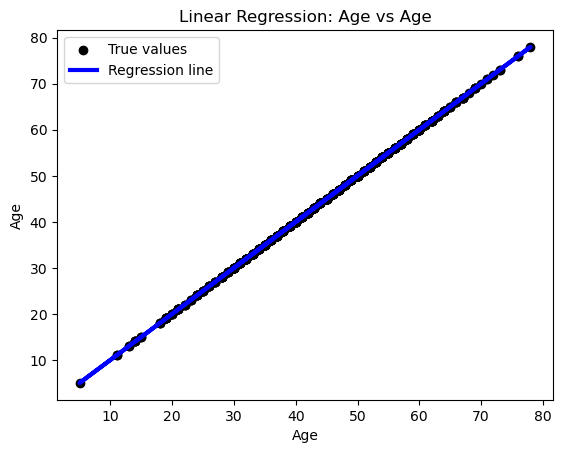

In [78]:
# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression: Age vs Age')
plt.xlabel('Age')
plt.ylabel('Age')
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 3.0648884104045988e-15
R-squared: 1.0


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the 'Billionaires Statistics Dataset.csv'
df = pd.read_csv('Billionaires Statistics Dataset.csv')

# Assuming 'finalWorth' is the target variable (replace it with the actual target variable)
y = df['finalWorth']

# Add an 'age' column to the features (for demonstration purposes)
# Replace this line with your actual 'age' column if it's already in the dataset
df['age'] = df['']  # Example: Adding 'some_column' as a proxy for 'age'

# Drop non-numeric columns (you might need to handle categorical variables differently)
X = df.select_dtypes(include='number')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate correlations with the target variable
correlations = X_train.apply(lambda x: x.corr(pd.Series(y_train)))

# Set a correlation threshold (e.g., 0.5)
threshold = 0.5

# Select features with correlation above the threshold
selected_features = X_train.columns[correlations.abs() > threshold]

# Print the selected features 
print("Selected Features:", selected_features)




Selected Features: Index(['finalWorth'], dtype='object')


In [98]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset or use a sample dataset (e.g., the Iris dataset)
# Replace the following lines with loading your dataset
# For example, X and y should be your feature matrix and target variable
# X, y = load_your_dataset()

# For this example, I'll use the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the 'Billionaires Statistics Dataset.csv'
df = pd.read_csv('Billionaires Statistics Dataset.csv')

# Assuming 'finalWorth' is the target variable (replace it with the actual target variable)
y = df['finalWorth']

# Select features for X (adjust this based on your actual dataset)
# For example, I'm using 'age', 'country', 'industries', and 'status' as features
X = df[['age', 'country', 'industries', 'status']]

# Label encode categorical columns
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])
X['industries'] = label_encoder.fit_transform(X['industries'])
X['status'] = label_encoder.fit_transform(X['status'])

# Replace NaN values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Iqra\AppData\Local\Temp\ipykernel_14912\119185412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = label_encoder.fit_transform(X['country'])
C:\Users\Iqra\AppData\Local\Temp\ipykernel_14912\119185412.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['industries'] = label_encoder.fit_transform(X['industries'])
C:\Users\Iqra\AppData\Local\Temp\ipykernel_14912\119185412.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Accuracy: 0.05
Classification Report:
              precision    recall  f1-score   support

        1000       0.00      0.00      0.00        16
        1100       0.03      0.12      0.04        25
        1200       0.08      0.58      0.14        31
        1300       0.00      0.00      0.00        21
        1400       0.07      0.15      0.10        26
        1500       0.04      0.17      0.06        23
        1600       0.00      0.00      0.00        23
        1700       0.00      0.00      0.00        18
        1800       0.00      0.00      0.00        12
        1900       0.00      0.00      0.00        16
        2000       0.00      0.00      0.00        11
        2100       0.00      0.00      0.00        21
        2200       0.00      0.00      0.00        14
        2300       0.00      0.00      0.00        12
        2400       0.00      0.00      0.00         7
        2500       0.00      0.00      0.00        13
        2600       0.00      0.00      0.00

C:\Users\Iqra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iqra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iqra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
